<a href="https://colab.research.google.com/github/HromovAndrey/II_Homework_mood_5_part_4/blob/main/%D0%94%D0%97_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [6]:

!pip install ultralytics opencv-python matplotlib numpy pillow

In [7]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [8]:
people_image_url = 'https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/humans.jpg'
response_people = requests.get(people_image_url)
people_image = Image.open(BytesIO(response_people.content))

In [9]:
forest_image_url = 'https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/forest.jpg'
response_forest = requests.get(forest_image_url)
forest_image = Image.open(BytesIO(response_forest.content))

In [10]:
forest_image = forest_image.resize(people_image.size)

In [11]:
people_image_cv = cv2.cvtColor(np.array(people_image), cv2.COLOR_RGB2BGR)
forest_image_cv = cv2.cvtColor(np.array(forest_image), cv2.COLOR_RGB2BGR)

In [12]:
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 81.5MB/s]


In [13]:
results = model.predict(source=people_image_cv)


0: 384x640 4 persons, 487.1ms
Speed: 25.3ms preprocess, 487.1ms inference, 60.6ms postprocess per image at shape (1, 3, 384, 640)


In [23]:
mask = results[0].masks.data[0].cpu().numpy()
mask_resized = cv2.resize(mask, (people_image_cv.shape[1], people_image_cv.shape[0]))
mask_bool = mask_resized.astype(bool)

In [24]:
result_image = forest_image_cv.copy()
result_image[mask_bool] = people_image_cv[mask_bool]
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

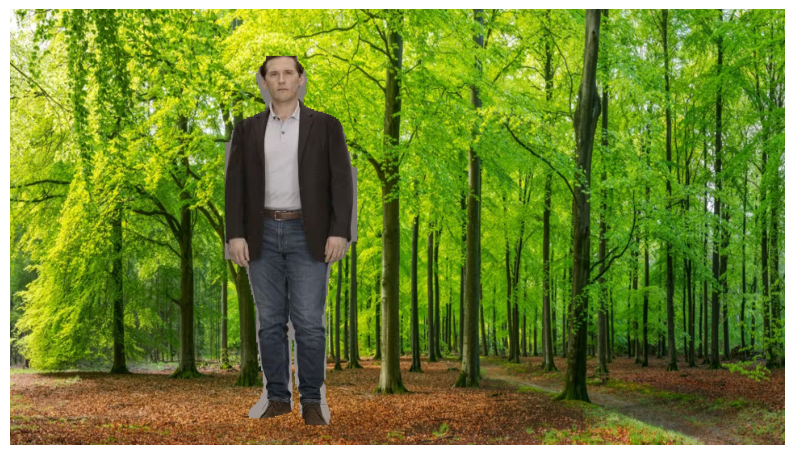

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(result_image_rgb)
plt.axis('off')
plt.show()

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)